### SciPy: Using solve_ivp for Logistic Growth
The below code uses SciPy's solve_ivp to model
logistic growth. It's a minimum working example
to get you started, though hopefully it's easy
to see how it can be extended to more complex
systems.

In [75]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [76]:
def logistic_growth(t, z, a_x, b_x, a_y, b_y):
    """
    Function which is the differential equation for
    two populations subject to logistic growth.

    The populations do not interact in this model.
    However, it should be clear how to modify the
    system to describe interactions between the
    populations (i.e., simply change the parameters + terms).

    Additionally, more differential equations can be added
    to the system by simply adding the relevent variables
    and parameters.
    """
    x, y = z
    dxdt = a_x * (b_x - x)
    dydt = a_y * (b_y - y)
    return [dxdt, dydt]

In [77]:
# define our time axis
# in this case we explicitly define
# both t_span and t_eval, though this isn't always needed
ti = 0
tf = 15
t_span = [ti, tf]
t_eval= np.linspace(ti, tf, 300)

# parameters
a_x = 0.5
b_x = 100
a_y = 0.25
b_y = 200
params = (a_x, b_x, a_y, b_y)

# initial conditions
x0 = 3
y0 = 20

# solve the IVP
sol = solve_ivp(logistic_growth, t_span, [x0, y0], args=params, t_eval=t_eval)

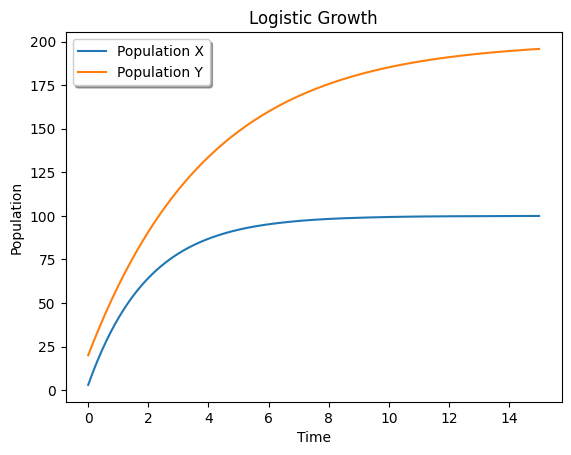

In [78]:
# plot the numerical solution to the IVP
z = sol.y
plt.plot(sol.t, z.T)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Population X', 'Population Y'], shadow=True)
plt.title('Logistic Growth')
plt.show()